## DS2000 & DS2001 Programming with Data & Practicum

# Project 2: Cardiovascular Disease: Causes, Treatment, and Prevention

## Parts 3 and 4: Due Friday, March 29, 10 PM

### 41 Points

We will continue our investigation of cardiovascular disease by examining the effect of hormone replacement therapy and the consumption of saturated fats. As a reminder, here is a roadmap of this project.

* In Part 1, we'll investigate the major causes of death in the world during the past century (from 1900 to 2015).
* In Part 2, we'll look at data from the Framingham Heart Study, an observational study into cardiovascular health.
* In Part 3, we'll examine the effect that hormone replacement therapy has on the risk of coronary heart disease for post-menopausal women using data from the Nurses' Heart Study.
* In Part 4, we'll explore the effect that the consumption of saturated fats has on cardiovascular death rates using data from the National Heart-Diet Study.

To get started, load `datascience`, `numpy`, `plots`, and `otter`.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import otter
grader = otter.Notebook("proj2parts3-4.ipynb")

## Part 3: The Nurses' Health Study
The Nurses' Health Study (NHS) is another very large observational study which has brought many insights into women's health. It began in 1976, by Dr. Frank Speizer, with questionnaires that were mailed to 121,964 female registered nurses in the United States asking about their medical history, cholesterol and blood pressure, current medications, and so on (one of the benefits of studying nurses is their ability to give reliably accurate answers to these questions). 

The study's initial focus was on investigating the long-term health effects of oral contraceptives, whose use had become much more widespread in the U.S. during the 1960s, but the focus soon expanded to investigating a wide variety of questions on women's health. The NHS is still ongoing, and is now tracking its third generation of nurses in the US.

**One of the most consequential early findings from the NHS was about hormone replacement therapy (HRT)**: supplementary estrogen and progesterone for post-menopausal women to relieve side effects of declining hormone levels due to menopause. The NHS found that HRT in post-menopausal women was negatively associated with heart attack risk. In other words, higher levels of HRT in post-menopausal women were associated with lower risk of heart attack. In a landmark 1985 paper in the *New England Journal of Medicine* (NEJM), Speizer and his coauthors wrote that **women on HRT are half as likely to suffer a heart attack over a certain time period.** [(Stampfer et al., 1985)](https://www.ncbi.nlm.nih.gov/pubmed/4047106) We'll define the term "relative risk" later in this section, and we'll also investigate the interpretation of these claims and their statistical basis.

**Question 3.1. (2 pts)** Based on the passage above, which of the following statements can you infer about the Nurses' Health Study? Assign `nhs_true_statements` to an array of integer(s) corresponding to the statement(s) you believe are correct.

1. Hormone replacement therapy is most commonly used by young women.
2. Since only nurses were included in the study, there's a chance that confounding factors influence our dataset.
3. The study found that estrogen and progesterone use had an association with CHD rates in post-menopausal women (CHD is a leading cause of heart attacks).
4. The study uses data that was self-reported by nurses for the analysis.

In [2]:
nhs_true_statements = make_array(2, 3, 4)
nhs_true_statements

array([2, 3, 4])

In [3]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**The scientists running the NHS wanted to compare post-menopausal women who had taken HRT with post-menopausal women who had never taken HRT, excluding all women who were not post-menopausal or who had previously suffered a heart attack.** This study design complicates the analysis because it creates a variety of reasons why women might drop in and out of the relevant comparison groups. They sent out surveys in 1976, 1978, and 1980, so they could receive information at different timestamps and thus participants might "change groups" midway through. 

If you're interested, read more about the study [here](https://pubmed.ncbi.nlm.nih.gov/4047106/).

Because women could (and did) drop into and out of the comparison groups in the middle of the study, it is difficult to make a table like we usually would, with one row per participant. In medical studies, individuals are typically weighted by the *amount of time* that they enrolled in the study. A more convenient sampling unit is a **person-month at risk**, which is one month spent by a particular woman in one of the comparison groups, during which she might or might not suffer a heart attack. Here, "at risk" just means the woman is being tracked by the survey in either of the two comparison groups, so that if she had a heart attack it would be counted in our data set.

**Example**: The table below tracks the histories of two hypothetical post-menopausal women in a six-month longitudinal study, who both enter the study in January 1978:
1. Alice has never been on HRT. She has a heart attack in March and is excluded for the remainder of the study period. 
2. Beatrice begins taking HRT for the first time in April and stays healthy throughout the study period.

| Name     | Month    | HRT | Heart Attack   |                                             
|----------|----------|-----|----------------|
| Alice    | Jan 1978 |  0  | 0              |
| Alice    | Feb 1978 |  0  | 0              |
| Alice    | Mar 1978 |  0  | 1              |
| Beatrice | Jan 1978 |  0  | 0              | 
| Beatrice | Feb 1978 |  0  | 0              |
| Beatrice | Mar 1978 |  0  | 0              |
| Beatrice | Apr 1978 |  1  | 0              |
| Beatrice | May 1978 |  1  | 0              |
| Beatrice | Jun 1978 |  1  | 0              |



Incidence refers to the proportion of persons who develop a condition during a particular time period. Since we want to examine the risk of developing a heart attack, we can define the **incidence rate of a heart attack** as the probability that a heart attack will happen to a given at-risk person in a given time period. The NHS calculated its effects in terms of the **relative risk**, which is simply the incidence rate for *person-months* in the HRT (Group A) group divided by the incidence rate in the no-HRT (Group B) group.

$$\text{Relative Risk} = \frac{\text{Incidence Rate(Treatment Group)}}{\text{Incidence Rate(Control Group)}}$$


**Question 3.2. (3 pts)** Complete the following statements, by setting the variable names to the value that correctly fills in the blank.

If the incidence rate of the treatment group is greater than the incidence rate of the control group, the relative risk will be \_\_`blank_1a`\_\_ one. This means that individuals in the treatment group are at \_\_`blank_1b`\_\_ risk of having a heart attack compared to those in the control group.

If the incidence rate of the treatment group is less than the incidence rate of the control group, the relative risk will be \_\_`blank_2a`\_\_ one. This means that individuals in the treatment group are at \_\_`blank_2b`\_\_ risk of having a heart attack compared to those in the control group.

If the incidence rate of the treatment group is equal to the incidence rate of the control group, the relative risk will be \_\_`blank_3a`\_\_ one. This means that individuals in the treatment group are at \_\_`blank_3b`\_\_ risk of having a heart attack compared to those in the control group.

`blank_1a`, `blank_2a`, `blank_3a` should be set to one of the following strings: "less than", "equal to", or "greater than"

`blank_1b`, `blank_2b`, `blank_3b` should be set to one of the following strings: "lower", "equal", or "higher" 

In [4]:
blank_1a = 'greater than'
blank_1b = 'higher'
blank_2a = 'less than'
blank_2b = 'lower'
blank_3a = 'equal to'
blank_3b = 'equal'

In [5]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Most statistical methods that deal with this type of data assume that we can treat a table like the one above as though it is a sample of independent random draws from a much larger population of person-months at risk in each group. **We will take this assumption for granted throughout the rest of this section.**

Instead of *person-months* at risk, the NHS used *person-years* at risk. It reported 51,478 total person-years at risk in the no-HRT group with 60 heart attacks occurring in total, as well as 54,309 person-years at risk in the HRT group with 30 heart attacks occurring in total. The table NHS below has one row for each person-year at risk. The two columns are 'HRT', recording whether it came from the HRT group (1) or no-HRT group (0), and 'Heart Attack', recording whether the participant had a heart attack that year (1 for yes, 0 for no).

In [6]:
NHS = Table.read_table('NHS.csv')
NHS.show(5)

HRT,Heart Attack
0,0
0,0
0,0
0,0
0,0


Using the NHS data, we can now conduct a hypothesis test to investigate the relationship between HRT and risk of CHD. As a reminder, the **incidence rate** is defined as the proportion of people who died in a specific group out of the total number who participated in the study from that group.

We'll use the following null and alternative hypotheses and test statistic:

**Null Hypothesis:** HRT *does not* affect the risk of CHD, and the true relative risk is equal to 1. Any deviation is due to random chance.

**Alternative Hypothesis:** HRT *decreases* the risk of CHD, and the true relative risk is less than 1.

**Test Statistic:** Relative risk of CHD between post-menopausal women receiving HRT and post-menopausal women not receiving HRT (the definition of relative risk is repeated here for your convenience):

$$\text{Relative Risk} = \frac{\text{Incidence Rate(Treatment Group)}}{\text{Incidence Rate(Control Group)}}$$

**Note:** Remember that we assume, under the null, that the two populations are derived from the same much larger population—under this assumption $\text{Incidence Rate(Treatment Group)} = \text{Incidence Rate(Control Group)}$. After simulation, we test this hypothesis by viewing the `relative_risk` for our simulated samples.

**Question 3.3. (3 pts)** Fill in the missing code below to write a function called `relative_risk` that takes in a table with the column labels `HRT` and `Heart Attack`, and computes the sample relative risk as an estimate of the population relative risk. Do *not* round your answer.

In [7]:
NHS.where('HRT', 1).where('Heart Attack', 1).num_rows/(NHS.where('HRT', 1).num_rows)

0.0005523946307241893

In [8]:
def relative_risk(tbl):
    """Return the ratio of the incidence rates (events per person-year) for the two groups"""
    treatment = tbl.where('HRT', 1).where('Heart Attack', 1).num_rows/(tbl.where('HRT', 1).num_rows)
    control = tbl.where('HRT', 0).where('Heart Attack', 1).num_rows/(NHS.where('HRT', 0).num_rows)
    return treatment/control

In [9]:
# check
relative_risk(NHS)

0.47393618000699694

In [10]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4. (4 pts)** Fill in the function `one_bootstrap_rr` so that it **generates one bootstrap sample (sample size is the whole table) and computes the relative risk**. Assign `bootstrap_rrs` to 15 estimates of the population relative risk.

*Note:* We are only doing 15 estimates because the code is slow! The cell may take a few seconds to run.

In [11]:
# this code may take some time to run
def one_bootstrap_rr():
    samp = NHS.sample()
    return relative_risk(samp)


for i in np.arange(15):
    new_bootstrap_rr = one_bootstrap_rr()
    bootstrap_rrs = make_array()
    bootstrap_rrs = np.append(bootstrap_rrs, new_bootstrap_rr)


In [12]:
grader.check("q3_4")

q3_4 results: All test cases passed!

In Question 3.4, you generated an array containing (just) 15 bootstrapped relative risks.  We need a lot more of these values (but that would take a lot of time) to obtain a distribution of these values and compute a p-value.  Well .. we've computed 2001 such values and saved them in a file called `bootstrap_rrs.csv`.

**Question 3.5. (3 pts)** The file `bootstrap_rrs.csv` contains a one-column table with 2001 saved bootstrapped relative risks (note that we only computed 15 of them in Question 3.4.). Use these bootstrapped values to compute a 95% confidence interval, storing the left endpoint as `ci_left` and the right endpoint as `ci_right`. 

Note that our method isn't exactly the same as the method employed by the study authors to get their confidence interval.

In [13]:
bootstrap_rrs_from_tbl = Table.read_table('bootstrap_rrs.csv').column(0)
ci_left = percentile(2.5, bootstrap_rrs_from_tbl)
ci_right = percentile(97.5, bootstrap_rrs_from_tbl)

# Please don't change this line.
print("Middle 95% of bootstrappped relative risks: [{:f}, {:f}]".format(ci_left, ci_right))

Middle 95% of bootstrappped relative risks: [0.295930, 0.730383]


In [14]:
grader.check("q3_5")

q3_5 results: All test cases passed!

The code below plots the confidence interval on top of the bootstrap histogram.

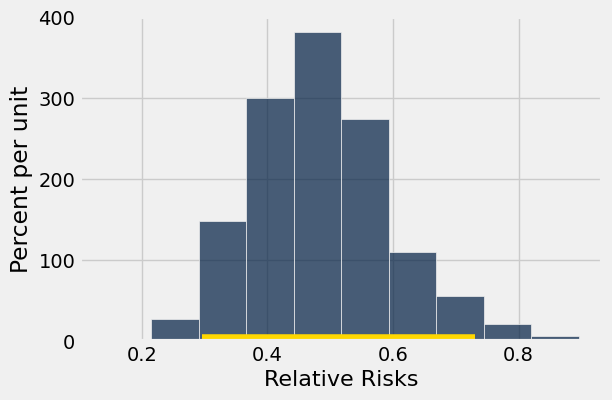

In [15]:
# Just run this cell
Table().with_column("Relative Risks", bootstrap_rrs_from_tbl).hist()
plots.plot([ci_left, ci_right], [.05,.05], color="gold"); 

**Question 3.6. (2 pts)** The following text is an excerpt from the abstract of the original 1985 paper. 
> As compared with the risk in women who had never used postmenopausal hormones, the age-adjusted relative risk of coronary disease in those who had ever used them was 0.5 (95 per cent confidence limits, 0.3 and 0.8; P = 0.007)... These data support the hypothesis that the postmenopausal use of estrogen reduces the risk of severe coronary heart disease. [(Stampfer et al., 1985)](https://www.ncbi.nlm.nih.gov/pubmed/4047106)

The authors give a 95% confidence interval of [0.3, 0.8] for the relative risk. Which of the following statements can be justified based on that confidence interval? Assign `ci_statements` to an array of integer(s) corresponding to the statement(s) you believe are correct.

1. There is between a 30% and 80% chance that any woman will suffer a heart attack during the study period.
2. If we used a P-value cutoff of 5%, we would reject the null hypothesis that HRT does not affect the risk of CHD.
3. If we redo the procedure that generated the interval [0.3, 0.8] on a fresh sample of the same size, there is a 95% chance it will include the true relative risk.

In [16]:
ci_statements = make_array(2, 3)  

In [17]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7. (3 pts)** What can you conclude from this test? Was hormone replacement therapy associated with an increased or decreased risk of heart attacks? Can we say that HRT caused an change in the risk of heart attacks? Explain your reasoning in 2-4 sentences. 

*Hint*: Refer back to Question 3.2 for the definition and interpretations of relative risk.

Using the 95% confidence interval with bounds of about 0.3 and 0.73, we can reject the null hypothesis that states that HRT does not affect the risk of CHD, and the true relative risk is equal to 1. We are 95% sure that the relative risk is between the values of 0.3 and 0.73, which would reflect that alternative hypothesis. Thus, it seems that HRT is associated with a decreased risk of heart attacks.

<!-- END QUESTION -->



Partly as a result of evidence from the NHS and other observational studies that drew similar conclusions, HRT drugs became a very popular preventive treatment for doctors to prescribe to post-menopausal woman. Even though there were known or suspected risks to the treatment (such as increasing the risk of invasive breast cancer), it was thought that the reduction in heart disease risk was well worth it.

However, a later study, the [Heart and Estrogen-Progestin Replacement Study](https://jamanetwork.com/journals/jama/fullarticle/187879), found that HRT did **not** have a significant impact on a woman's risk of CHD. These findings contradicted the results of the Nurses' Heart study, challenging the efficacy of a treatment that had become the standard of care for heart disease prevention. The HERS study authors put forward a possible answer regarding why the NHS study might be biased:
> The observed association between estrogen therapy and reduced CHD risk might be attributable to selection bias if women who choose to take hormones are healthier and have a more favorable CHD profile than those who do not. Observational studies cannot resolve this uncertainty.

**Selection bias** occurs in observational studies when there is a systematic difference between participants that receive a treatment and participants that do not receive a treatment. When this type of bias is present, the observed treatment effect might be a result of an unmeasured confounding variable.

**Question 3.8. (3 pts)**: If women who choose to take hormones are healthier to begin with than women who choose not to, why might that systematically bias the results of observational studies like the NHS? Would we expect observational studies to overestimate or underestimate the protective effect of HRT?

If there were selection bias in this study, then the true reason for the observed decrease in CHD could have been the health of the women who opted to take the HRT drugs. If we did not know this, it would appear that the HRT drugs were the real reason for this trend.

<!-- END QUESTION -->



### Further reading

If you're interested in learning more, you can check out these articles:

* [Origin story of the Framingham Heart Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1449227/)
* [NYT article on the Nurses' Health Study and the HERS study](https://www.nytimes.com/2003/04/22/science/hormone-studies-what-went-wrong.html)

## Part 4: Diet and Cardiovascular Disease

To establish a causal link between saturated fat intake, serum cholesterol, and heart disease, a group of doctors
in the US established the National Heart-Diet Study. The study was based in 6 centers: Baltimore, Boston, Chicago, Minneapolis-St. Paul, Oakland, and Faribault, MN. The first 5 centers recruited volunteers from the local population: volunteers and their families were asked to adjust their diet to include more or less saturated fat.

The sixth center was organized by Dr. Ivan Frantz, and its study was known as the Minnesota Coronary
Experiment.  The main difference between the Minnesota Coronary Experiment and the rest of the National Diet-Heart Study was
the setting. While the other centers in the study looked at volunteers, Dr. Frantz conducted his study at Faribault
State Hospital, which housed patients who were institutionalized due to disabilities or mental illness.

Although standards for informed consent in participation weren't as strict then as they are today, the study was
described as follows:

>No consent forms were required because the study diets were considered to be acceptable as house diets and
the testing was considered to contribute to better patient care. Prior to beginning the diet phase, the project was
explained and sample foods were served. Residents were given the opportunity to decline participation.

Despite the level of detail and effort in the study, the results of the study were never extensively examined until
the early 21st century. Over 40 years after the data were collected, Dr. Christopher Ramsden heard about the
experiment and asked Dr. Frantz's son, Robert, to uncover the files in the Frantz family home's dusty basement.
You can learn more about the story of how the data was recovered on the [Revisionist History podcast](http://revisionisthistory.com/episodes/20-the-basement-tapes) or in [Scientific American magazine](https://www.scientificamerican.com/article/records-found-in-dusty-basement-undermine-decades-of-dietary-advice/).

In recent years, poor treatment of patients at Faribault State Hospital (and other similar institutions in Minnesota)
has come to light: the state has recently changed patients' gravestones from numbers to their [actual names](https://www.tcdailyplanet.net/minnesota-saying-sorry-treatment-persons-disabilities/), and apologized for [inhumane treatment of patients](https://www.tcdailyplanet.net/minnesota-saying-sorry-treatment-persons-disabilities/).

**Question 4.1. (2 pts)** While the data from such a study may be useful scientifically, it also raises major ethical concerns. Describe at least one ethical problem with the study conducted at Faribault State Hospital.

*Hint*: There isn't necessarily a single right or wrong answer to this question. If you're not sure, some areas of consideration may be the study organizers' selection of participants for the study, as well as their justification for not using consent forms. You could also ask yourself how the project might have been explained to the patients prior to the diet phase, and to what degree were they capable of consent.

One ethical concern in this study is the lack of informed consent. Participants should have been completely informed of what the experiment entailed, and they should have been required to sign a form in agreement.

<!-- END QUESTION -->



### The Data

The National Heart-Diet Study was very relevant for analysis on the relationship between saturated fats and heart disease. However, an important part of medical studies is *replication*, or being able to see the same results in multiple studies.

Suppose that 50 scientists decide to independently recreate the NHDS study. Each of these fictional researchers studied 100 people and collected data on whether their diet was **high** or **low** in saturated fats. To imitate the original experiment, the researchers followed up 5 years later and recorded whether each participant was alive or dead at that time. Note that this fictional study is unlike Dr. Frantz's experiment in that this scenario is observing whether the participants' diets were high or low in saturated fats. The participants are not assigned to a certain group. 

We will assume that all 50 scientists sampled from the same population, described in full below. Note that *normally* we would never have access to this information - we'd only know the data in our sample. The table `population` has a row for each person in the population, and the following three attributes:
- **Age**: a string, the age group of the person
- **Diet**: a string, "low" or "high" describing the amount of saturated fats in the person's diet
- **Died**: a boolean, describing whether or not the person had died within the 5 years

Run the cell below to see what the population looked like.

In [18]:
population = Table.read_table('population.csv').drop(0)
population.show(5)

Age,Diet,Died
0-34,Low,True
0-34,Low,True
0-34,Low,True
0-34,Low,False
0-34,Low,False


### Running a Hypothesis Test
You have been tasked with helping these scientists explore how different diets are associated with death rates. Since the samples were taken at random, the 50 scientists may have reached different conclusions, even if they do the same hypothesis test.

**Question 4.2. (3 pts)**: Set up a null hypothesis and an alternative hypothesis that we can use to answer whether or not the amount of saturated fat in ones diet is associated with different rates of death in the two groups. We are interested in observing *any* change, not specifically an increase or decrease in death rates.

Null Hypothesis: the amount of saturated fat in an individual's diet has no effect on rate of death.

Alternative Hypothesis: the amount of saturated fat in an individual's diet has an effect on rate of death.

**Question 4.3. (2 pts)**: In thinking of a test statistic, one researcher decides that the absolute difference in the number of people who died in each group is a valid test statistic. Give one specific reason why this test statistic will not work.


Absolute difference does not give us insight into which group had more or less of a death rate.

<!-- END QUESTION -->



To combat the problem above, we instead decide to use the the absolute difference in incidence rates between the two groups as our test statistic. Here, the incidence rate of death is defined as **the proportion of people who *died* in a specific group out of the total number who participated in the study from that group.**

The researchers have provided two functions that may help you. These are similar to functions you have defined earlier to perform hypothesis tests.

In [19]:
# Run this cell.  Make sure you understand what these functions do.

def compute_incidence_statistic(data_tbl):
    """"Given a sample from population, returns the test statistic"""
    summed_tbl = data_tbl.with_column("Total", 1).drop('Age').group('Diet', sum)
    incidence_rate = summed_tbl.column("Died sum") / summed_tbl.column("Total sum")
    return abs(incidence_rate.item(0) - incidence_rate.item(1))

def simulate_death_null(tbl):
    """Simulates a single value of the test statistic under the null hypothesis."""
    shuffled_death = tbl.select('Died').sample(with_replacement=False).column(0)
    return compute_incidence_statistic(tbl.with_column('Died', shuffled_death))

**Question 4.4. (5 pts)**: We are now in a position to run a hypothesis test to help differentiate between our two hypotheses using any set of sample data. Define a function `complete_test` which takes in `tbl`, a single sample from the population. It should shuffle labels and calculate the incidence rate difference for the sample under the null hypothesis 100 times, and use these simulated values to return a p-value with respect to the observed data.

*Hint*: The two functions defined above, `compute_incidence_statistic` and `simulate_death_null`, may be useful here. 

In [20]:
def complete_test(tbl):
    ird = make_array()
    for i in np.arange(100):
        ird = np.append(ird, simulate_death_null(tbl))

    observedvalue = compute_incidence_statistic(tbl)
    return (sum(ird >= observedvalue))/100
    

our_p_value = complete_test(population)
our_p_value

0.19

In [21]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5. (4 pts)**: Using the function you just defined, simulate taking 50 different samples of size 100 without replacement from the `population` table, and **run a hypothesis test on each of them**. (Note that we are running 50 hypothesis tests which will produce an array of 50 p-values, rather than computing 50 test statistics.  Recall that the setting was that 50 scientists decided to independently recreate the NHDS study. Each of these fictional researchers studied 100 people and collected data on whether their diet was high or low in saturated fats.) Store the resulting p-values in an array called `results`.

*Note*: The cell may take a few seconds to run.

In [22]:
repetitions = 50
results = make_array()
for i in np.arange(repetitions):
    samp = population.sample(100, with_replacement=False)
    pval = complete_test(samp)
    results = np.append(results, pval)
    
results    

array([ 0.08,  0.22,  1.  ,  0.75,  1.  ,  0.63,  1.  ,  0.24,  0.35,
        0.17,  1.  ,  0.48,  1.  ,  0.57,  0.49,  1.  ,  0.21,  0.65,
        0.6 ,  0.44,  0.06,  0.01,  0.64,  0.62,  1.  ,  0.36,  1.  ,
        0.63,  0.49,  1.  ,  0.34,  0.67,  0.28,  1.  ,  0.66,  0.52,
        0.75,  1.  ,  0.68,  1.  ,  0.58,  0.22,  0.27,  1.  ,  0.06,
        0.23,  1.  ,  0.66,  0.17,  0.05])

In [23]:
grader.check("q4_5")

q4_5 results: All test cases passed!

**Question 4.6. (2 pts)**: For each test, can its scientist conclude that the amount of fat in ones diet is associated with a changed death rate? Suppose we decide to use a p-value cutoff of 0.05. Assign `rejected_null` to an array whose entries are either `True` or `False` depending on whether the corresponding test rejected the null or failed to reject the null, respectively. For example, if the 0th test failed to reject the null, the 0th item in the array should be `False`. 

<!--
BEGIN QUESTION
name: q4_6
manual: false
points:
- 0
- 0
- 1.5
- 1.5
-->

In [24]:
rejected_null = results <= 0.05
rejected_null

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True], dtype=bool)

In [25]:
grader.check("q4_6")

q4_6 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [26]:
grader.check_all()

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q4_4 results: All test cases passed!

q4_5 results: All test cases passed!

q4_6 results: All test cases passed!

### Congratulations! 

You have completed your own large scale case study into cause and effect surrounding one of the world's leading causes of death: cardiovascular disease. Your investigation has taken you through multiple important data sets and across decades of medical research.